# Company Exercise

In [424]:
#@title
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


In [ ]:
#@title
from google.colab import files

uploaded = files.upload()

for i in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=i, length=len(uploaded[i])))

In [ ]:
#@title
parser = lambda x: datetime.strptime(x, "%Y%m")

df = pd.read_csv('Producto_vts.csv',parse_dates=['PERIODO'],date_parser=parser)
df1 = pd.read_csv('Producto_uds.csv',parse_dates=['PERIODO'],date_parser=parser)
df2 = pd.read_csv('info_cltes.csv')

# Join Tables

In [142]:
df_concat = pd.concat([df,df1],axis=1)
df_concat = df_concat.loc[:,~df_concat.columns.duplicated()].drop('TIPO REGISTRO',axis=1)
table = df_concat.merge(df2, on='ID CLIENTE')
table.head()

,ID CLIENTE,PRODUCTO,PERIODO,VALOR,UNIDADES,PAIS,TIPO DE CLIENTE
0,1,A,2019-01-01,0.0,0,JAPON,Exportación
1,1,A,2019-02-01,480.0,3000,JAPON,Exportación
2,1,A,2019-03-01,0.0,0,JAPON,Exportación
3,1,A,2019-04-01,0.0,0,JAPON,Exportación
4,1,A,2019-05-01,0.0,0,JAPON,Exportación


# Total Sales by Product

In [455]:
#@title
t1 = table.groupby('PRODUCTO').agg(['sum'])[['VALOR','UNIDADES']]
t1['VALOR(%)'] = t1['VALOR']/t1['VALOR'].sum() * 100
t1['UDS (%)'] = t1['UNIDADES']/t1['UNIDADES'].sum() * 100
t1['Precio Promedio ($)'] = t1['VALOR']/t1['UNIDADES']
t1

,VALOR,UNIDADES,VALOR(%),UDS (%),Precio Promedio ($)
,sum,sum,,,
PRODUCTO,,,,,
A,"8,086,871.49",46834797,87.16,91.10,0.17
B,"376,764.80",456610,4.06,0.89,0.83
C,"355,196.38",2136545,3.83,4.16,0.17
D,"299,198.12",1336980,3.22,2.60,0.22
E,"131,667.80",585800,1.42,1.14,0.22
F,"28,658.17",56800,0.31,0.11,0.50


# Total Sales by Type of Client

In [457]:
#@title
t2 = table.groupby('TIPO DE CLIENTE').agg(['sum'])[['VALOR','UNIDADES']]
t2['VALOR (%)'] = t2['VALOR']/t2['VALOR'].sum() * 100
t2['UDS (%)'] = t2['UNIDADES']/t2['UNIDADES'].sum() * 100
t2['Precio Promedio ($)'] = t2['VALOR']/t2['UNIDADES']
t2

,VALOR,UNIDADES,VALOR (%),UDS (%),Precio Promedio ($)
,sum,sum,,,
TIPO DE CLIENTE,,,,,
Exportación,"8,908,207.66",48935332,96.01,95.19,0.18
Local,"370,149.10",2472200,3.99,4.81,0.15


# Total Sales by Country

In [456]:
#@title
t3 = table.groupby('PAIS').agg(['sum'])[['VALOR','UNIDADES']]
t3['VALOR (%)'] = t3['VALOR']/t3['VALOR'].sum() * 100
t3['UDS (%)'] = t3['UNIDADES']/t3['UNIDADES'].sum() * 100
t3['Precio Promedio ($)'] = t3['VALOR']/t3['UNIDADES']
t3.sort_values(by='VALOR (%)',ascending=False)

,VALOR,UNIDADES,VALOR (%),UDS (%),Precio Promedio ($)
,sum,sum,,,
PAIS,,,,,
ESTADOS UNIDOS,"3,118,159.37",16467950,33.61,32.03,0.19
INGLATERRA,"2,757,020.05",17410788,29.71,33.87,0.16
PAISES BAJOS,"1,876,933.80",7665390,20.23,14.91,0.24
CANADA,"655,030.53",4155471,7.06,8.08,0.16
COLOMBIA,"370,149.10",2472200,3.99,4.81,0.15
ESPAÑA,"123,373.33",648540,1.33,1.26,0.19
BRASIL,"71,316.40",710860,0.77,1.38,0.10
SUECIA,"70,167.60",467280,0.76,0.91,0.15


# Total Sales by Quarter

In [231]:
#@title
table.resample('Q').sum()[['VALOR','UNIDADES']]

,VALOR,UNIDADES
PERIODO,,
2019-03-31,"2,254,623.26",11804842
2019-06-30,"2,124,469.76",12252148
2019-09-30,"1,670,865.15",9528306
2019-12-31,"1,566,123.60",8659005
2020-03-31,"1,662,274.99",9163231


# Q/Q Analysis by Product Sales

In [418]:
#@title
table.set_index('PERIODO',inplace=True)
table['Quarter'] = table.index.quarter
table['Año'] = table.index.year

quarter1 = (table['Quarter'] == 1)
qvsq = table[quarter1].groupby(['PRODUCTO','Año']).sum()[['VALOR','UNIDADES']]
qvsq.reset_index(inplace=True)
qvsq = qvsq.pivot(index='PRODUCTO',columns='Año',values=['VALOR','UNIDADES'])
qvsq['Delta Valor %'] = qvsq.VALOR.pct_change(axis=1)[2020]*100
qvsq['Delta Unidades %'] = qvsq.UNIDADES.pct_change(axis=1)[2020]*100
qvsq

VALOR               ... Delta Valor % Delta Unidades %
Año              2019         2020  ...                               
PRODUCTO                            ...                               
A        1,957,520.71 1,465,956.55  ...        -25.11           -21.35
B           62,071.80    64,093.00  ...          3.26            -3.29
C           69,795.88   105,227.52  ...         50.76            61.61
D          108,690.00    15,189.92  ...        -86.02           -79.43
E           50,197.20         0.00  ...       -100.00          -100.00
F            6,347.67    11,808.00  ...         86.02            75.34

[6 rows x 6 columns]

## By Country

In [460]:
country = 'ESTADOS UNIDOS'

In [461]:
#@title
quarter1 = (table['Quarter'] == 1) & (table['PAIS'] == country)
qvsq = table[quarter1].groupby(['PRODUCTO','Año']).sum()[['VALOR','UNIDADES']]
qvsq.reset_index(inplace=True)
qvsq = qvsq.pivot(index='PRODUCTO',columns='Año',values=['VALOR','UNIDADES'])
qvsq['Delta Valor %'] = qvsq.VALOR.pct_change(axis=1)[2020]*100
qvsq['Delta Unidades %'] = qvsq.UNIDADES.pct_change(axis=1)[2020]*100
qvsq

VALOR             ... Delta Valor % Delta Unidades %
Año            2019       2020  ...                               
PRODUCTO                        ...                               
A        617,785.77 567,455.00  ...         -8.15            -9.47
B         60,733.80  60,751.00  ...          0.03            -6.82
C          4,582.50  16,837.10  ...        267.42           291.33

[3 rows x 6 columns]

# Some Charts

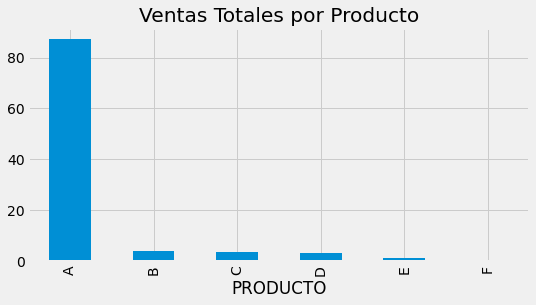

In [449]:
t1['% VALOR'].plot.bar(figsize=(8,4))
plt.title('Ventas Totales por Producto');

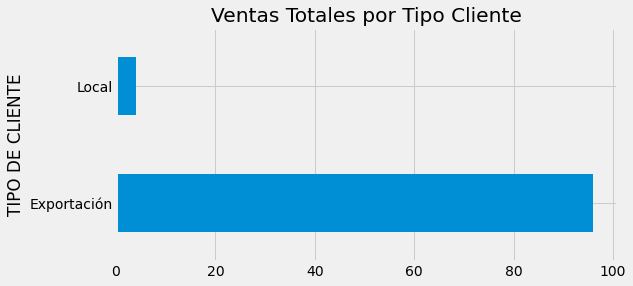

In [450]:
t2['% VALOR'].plot.barh(figsize=(8,4))
plt.title('Ventas Totales por Tipo Cliente');

# Summary



* Product A is the one that accumulates the highest sales in all periods, obtaining 91% of total units. It is also the one that generates the highest revenue to the company

* Clearly, commercial efforts should be concentrated on product A, as the others do not have much sales potential over total sales

* Export sales generate 96% of the company's total sales

* In foreign countries, the one that generates the higher sales is USA with 35% of total sales

* 95% of sales are concentrated in 5 countries: USA, England, Netherlands, Canada and Spain

* Comparing the first quarter of 2019 and 2020, product A decreases 21% in units and 25% in revenue.
This is due to the main losses in the USA, Netherlands, Spain and England

* Product B has the highest average price compared to other products ($ 0.83)

* Sales for the first half of 2019 were 35% higher compared to the second half of the same year

